In [19]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [20]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

def mean(data,a):
    print('平均值',data[a].mean())
    print('方差',data[a].std())

def box_polt(a):
    zhongwei = a.median()
    mean = a.mean()
    q1 = a.quantile(0.25)
    q2 = a.quantile(0.5)
    q3 = a.quantile(0.75)
    q4 = a.quantile(1)
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    print('--------------')
    print('中位:',zhongwei)
    print('平均:',mean)    
    print('--------------')
    print('50% :',q2)
    print('75% :',q3)
    print('100%:',upper)
    print('max :',q4)
    print('--------------')
    list_ = []
    list_.append(q2)
    list_.append(q3)
    list_.append(upper)
    return list_

def data_order(a,b):
#     lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚花语指标模型/data/Ddata.csv'
#     code = 'gbk'
    data = improt_data(lujing,code)
    if b == 0:
        df_hsh_max = data[data['入店人数'] > a]
        k = df_hsh_max
        return k
    elif a == 0:
        df_hsh_min = data[data['入店人数'] < b  ]
        k = df_hsh_min
        return k
    else:
        df_hsh_ = data[(data['入店人数'] >a) & (data['入店人数'] < b) ]
        k = df_hsh_
        return k 
    
def linear(x,y):
    from sklearn import metrics
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
    print('数据分集查看')
    print ('X训练',X_train.shape)
    print ('y训练',y_train.shape)
    print ('X测试',X_test.shape)
    print ('y测试',y_test.shape)
    print('-------------')
    linear =  linear_model.LinearRegression()
    linear.fit(X_train,y_train)
    print('线性结截距:', linear.intercept_)
    print ('回归系数',linear.coef_)
    y_pred = linear.predict(X_test)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

def line_bg_rd(x1,y1):   
    x = x1
    y = y1
    data_min = data_order(x,y)
    baoguang = data_min['入店人数'].values.reshape(-1,1)
    jindian = data_min['下单人数'].values.reshape(-1, 1)
    linear(baoguang,jindian)

def drop(data):
    a = data
    a.drop_duplicates(subset='商家ID',inplace = True,keep = 'last')
    print(a['商家ID'].count())


def cluster_look(data,list__):
    list_ = list__
    x = 0
    s = ['max','one','two','min']
    for i in list_:
        df = data[data['cluster'] == i]
        print( s[x] +'-分类:' + str(df['cluster'].count()))    
        x = x+1


In [22]:
lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚月季度数据/7月份数据/2data/Mdata_kmeans.csv'
code = 'gbk'
data = improt_data(lujing,code)

In [23]:
data

,Unnamed: 0,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,推单数,有效订单数,下单新客人数,入店转化率,下单转化率,原价交易额,实付交易额,商家补贴金额,复购人数,新客转化率,复购率,原价客单价,实付客单价,有效率,cluster
0,130,20200701,20200731,9438920,拾花间鲜花礼品鲜花店,鲜花组,广东省,佛山,否,20200703,在线,23,22.8,44869,633,34,31,25,26,1.41,0.05,6225,2701.0,3780.0,8,0.764706,0.235294,183.088235,79.441176,0.806452,2
1,156,20200701,20200731,9529764,花之坊鲜花礼品鲜花店,鲜花组,新疆维吾尔自治区,哈密地区,否,20200717,在线,14,13.8,25088,408,10,9,7,7,1.63,0.02,1362,821.0,566.0,3,0.700000,0.300000,136.200000,82.100000,0.777778,1
2,1,20200701,20200731,9024278,友新意鲜花坊鲜花礼品鲜花店,鲜花组,陕西省,西安,否,20200508,在线,18,18.0,21575,606,53,50,48,43,2.81,0.09,10547,5459.4,5218.6,10,0.811321,0.188679,199.000000,103.007547,0.960000,1
3,7,20200701,20200731,9043317,花坞鲜花礼品鲜花店,鲜花组,福建省,福州,否,20200508,在线,18,18.0,15287,429,20,21,19,19,2.81,0.05,4831,2043.0,2878.0,1,0.950000,0.050000,241.550000,102.150000,0.904762,1
4,59,20200701,20200731,9323842,花无缺鲜花礼品鲜花店,鲜花组,内蒙古自治区,锡林郭勒盟,否,20200617,在线,13,12.0,15265,390,26,23,23,23,2.55,0.07,5386,2382.0,3099.0,3,0.884615,0.115385,207.153846,91.615385,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,81,20200701,20200731,9370710,戴氏花艺鲜花礼品鲜花店,鲜花组,山东省,临沂,否,20200708,在线,0,0.0,299,15,0,0,0,0,5.02,0.00,0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0
187,112,20200701,20200731,9415707,鑫福源鲜花,鲜花组,山东省,青岛,否,20200629,下线,11,11.3,261,2,0,0,0,0,0.77,0.00,0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0
188,132,20200701,20200731,9456415,夏沫鲜花（文峰店）,鲜花组,山东省,青岛,否,20200706,下线,12,12.5,222,18,4,4,4,4,8.11,0.22,816,256.0,580.0,0,1.000000,0.000000,204.000000,64.000000,1.000000,0
189,189,20200701,20200731,9641339,MINE FUN鲜花礼品鲜花店,鲜花组,浙江省,杭州,否,20200730,在线,6,5.7,84,3,0,0,0,0,3.57,0.00,0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [24]:
# data.describe()

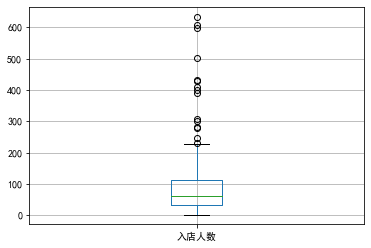

In [25]:
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 
data.boxplot('入店人数')

In [26]:
a = data['入店人数']
list_ = box_polt(a)
q1 = list_[0]
q2 = list_[1]
q3 = list_[2]
q04 =  0
print(q1)
print(q2)
print(q3)

--------------
中位: 62.0
平均: 96.92146596858639
--------------
50% : 62.0
75% : 112.5
100%: 230.25
max : 633.0
--------------
62.0
112.5
230.25


In [27]:
print('min：')
line_bg_rd(q04,q1)
print('#####################')
print('two：')
line_bg_rd(q1,q2)
print('#####################')
print('one：')
line_bg_rd(q2,q3)
print('#####################')
print('max：')
line_bg_rd(q3,q04)

min：
数据分集查看
X训练 (71, 1)
y训练 (71, 1)
X测试 (24, 1)
y测试 (24, 1)
-------------
线性结截距: [0.12487411]
回归系数 [[0.0502402]]
RMSE: 1.519366094808671
#####################
two：
数据分集查看
X训练 (35, 1)
y训练 (35, 1)
X测试 (12, 1)
y测试 (12, 1)
-------------
线性结截距: [-6.06648437]
回归系数 [[0.15549225]]
RMSE: 3.232768114432507
#####################
one：
数据分集查看
X训练 (24, 1)
y训练 (24, 1)
X测试 (9, 1)
y测试 (9, 1)
-------------
线性结截距: [4.66892268]
回归系数 [[0.06532564]]
RMSE: 6.05380323618726
#####################
max：
数据分集查看
X训练 (11, 1)
y训练 (11, 1)
X测试 (4, 1)
y测试 (4, 1)
-------------
线性结截距: [22.21568025]
回归系数 [[0.02923748]]
RMSE: 11.95689988263314


In [28]:
data_max = data_order(q3,q04)
data_one = data_order(q2,q3)
data_two = data_order(q1,q2)
data_min = data_order(q04,q1)

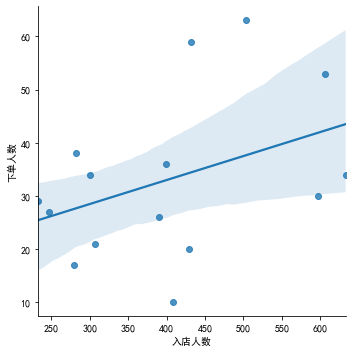

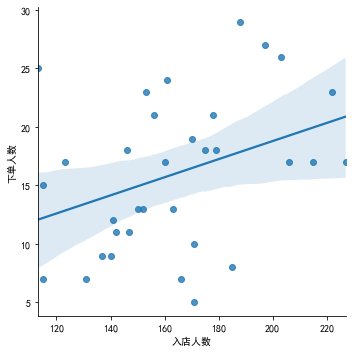

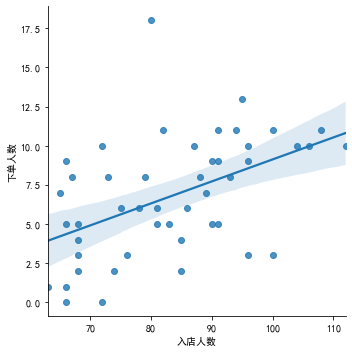

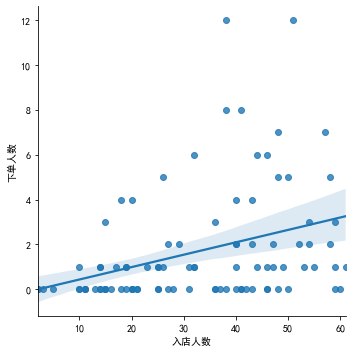

In [29]:
sns.lmplot(x="入店人数", y="下单人数",data=data_max,fit_reg=True)
sns.lmplot(x="入店人数", y="下单人数",data=data_one,fit_reg=True)
sns.lmplot(x="入店人数", y="下单人数",data=data_two,fit_reg=True)
sns.lmplot(x="入店人数", y="下单人数",data=data_min,fit_reg=True)

In [30]:
drop(data_max)
drop(data_one)
drop(data_two)
drop(data_min)

15
33
47
95


In [31]:
drop(data_max)

15


In [32]:
list_t = [2,1,3,0]
cluster_look(data_max,list_t)
print('-------------')
cluster_look(data_one,list_t)
print('-------------')
cluster_look(data_two,list_t)
print('-------------')
cluster_look(data_min,list_t)

max-分类:1
one-分类:5
two-分类:8
min-分类:1
-------------
max-分类:0
one-分类:0
two-分类:18
min-分类:15
-------------
max-分类:0
one-分类:0
two-分类:19
min-分类:28
-------------
max-分类:0
one-分类:0
two-分类:9
min-分类:86


In [33]:
mean(data_max,'下单转化率')
print('-------------------')
mean(data_one,'下单转化率')
print('--------------------')
mean(data_two,'下单转化率')
print('--------------------')
mean(data_min,'下单转化率')

平均值 0.0866666666666667
方差 0.03716116764786032
-------------------
平均值 0.09818181818181818
方差 0.04057820731736321
--------------------
平均值 0.08
方差 0.04363883392217254
--------------------
平均值 0.04694736842105263
方差 0.06779307822902778
